## Object Detection - Common Alogrithms


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


### Template Matching
#### This matching is used when we have some type of template to match. 
#### Lets say if We saw a picture, we ill try find the common faces in the image. That means we are matching eacg face in image with set of images in our mind and if a image match we can recognise a person.
#### Same way we compare two images and try to find if image A exists in image B

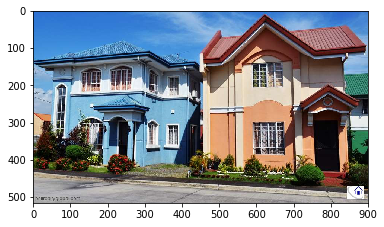

In [8]:
#Upload a main image
main = cv2.imread('house-main.jpg')
#converting images from Open Cv compatibility to matplot lib compatibility, so that we can plot them for comparison
main = cv2.cvtColor(main, cv2.COLOR_BGR2RGB)
#just displaying the image
plt.imshow(main)

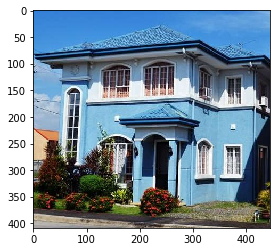

In [9]:
#Upload a subset of image
subset = cv2.imread('template.jpg')
#converting images from Open Cv compatibility to matplot lib compatibility, so that we can plot them for comparison
subset = cv2.cvtColor(subset, cv2.COLOR_BGR2RGB)
#just displaying the image
plt.imshow(subset)

### Above images show that we have a larger image and we are just searching for subset of image inside that large image.

### Now we will run different template matching techinques to check which techniques are better for template matching.

In [14]:
#Different template matching techniques available in open cv
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED']

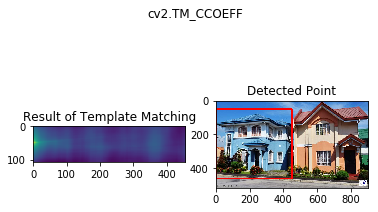

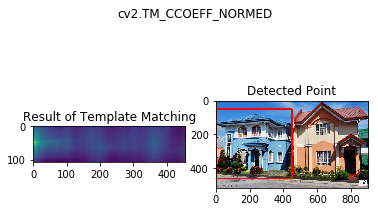

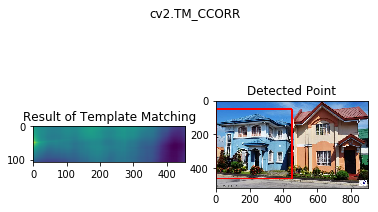

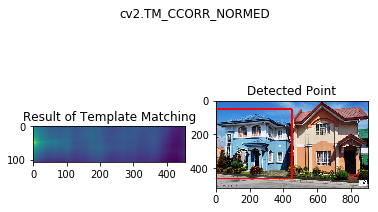

In [15]:
#We  will run all of them to find most suitable techniques.

for method in methods:
    #Making a copy of main image for displaying comparison
    main_copy = main.copy()
    #Comparison using one of the method
    result = cv2.matchTemplate(main_copy, subset, eval(method))
    #Geting the location of the map
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    height, width, chanel = subset.shape
    #Setting up coordinates of match - it will give us a starting point for drawing a rectangle
    bottom_right = (max_loc[0] + width, max_loc[1] + height)
    # Draw the Red Rectangle on main image
    cv2.rectangle(main_copy,max_loc, bottom_right, 255, 10)
    
    # Plot the Images
    plt.subplot(121)
    plt.imshow(result)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(main_copy)
    plt.title('Detected Point')
    plt.suptitle(method)
    
    
    plt.show()
    print('\n')
    print('\n')

## By above example we can see that almost all of the template matching techniques have done the job . 

## The main disadvantage of this technique is that it needs the exact match. That means we have to have both images in advance then only we can find a match.

## Harris corner detection technique

### This is one of the very common technique for object detection. It is very close to human vision. We try to find different objects by finding the corner from where the current patternt changes. Same way computer try to find a spot where whichever side it moves a cursor , it will find a change. 

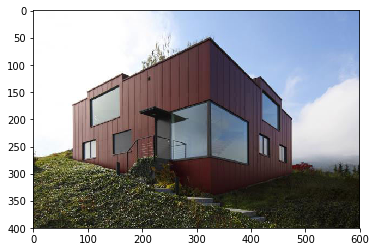

In [35]:
# upload image of house with corners
main = cv2.imread('corner-house.jpg')
main_copy = main.copy()
#converting images from Open Cv compatibility to matplot lib compatibility, so that we can plot them for comparison
main = cv2.cvtColor(main, cv2.COLOR_BGR2RGB)
#just displaying the image
plt.imshow(main)

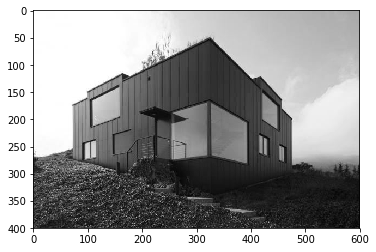

In [36]:
#Converting image values to grayscale for better detection
grayscale_house = cv2.cvtColor(main,cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale_house,cmap='gray')

#Converting image values to float . It is needed for harrison technique
gray = np.float32(grayscale_house)
plt.imshow(gray,cmap='gray')



In [37]:
# Corner Harris Detection
# Blocksize decides the quantum of change
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [38]:
# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

In [39]:
# Threshold for an optimal value, it may vary depending on the image.
main[dst>0.01*dst.max()]=[255,0,0]

Text(0.5,0.98,'Harris Detection Method')

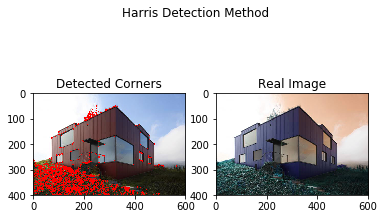

In [41]:
# Plot the Images
plt.subplot(121)
plt.imshow(main)
plt.title('Detected Corners')
    
plt.subplot(122)
plt.imshow(main_copy)
plt.title('Real Image')
plt.suptitle('Harris Detection Method')

### In the above images the red dots are the corners. This technique has real good use in object detection.